In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import getpass
import json
import requests
from requests.auth import HTTPBasicAuth

plt.style.use('ggplot')

In [2]:
USER     = 'rogerallen'                  # your github userid here
PASSWORD = getpass.getpass()             # one way to not leak your password to the world
MYAUTH   = HTTPBasicAuth(USER, PASSWORD)

········


In [3]:
# used this for testing
def do_test():
    response = requests.get("https://api.github.com/user", auth=MYAUTH)
    text = json.loads(response.text)
    try:
        if text['login'] == USER:
            print("success")
    except:
        print(text['message'])

# get one page of USER repositories
def get_repos(page):
    url = "https://api.github.com/users/"+USER+"/repos?page=%d"%(page)
    response = requests.get(url, auth=MYAUTH)
    repos = json.loads(response.text)
    return repos

# get all the USER repositories via multiple requests
def get_all_repos():
    page = 1
    all_repos = []
    repos = get_repos(page)
    all_repos += repos
    page += 1
    while (len(repos) == 30):
        repos = get_repos(page)
        all_repos += repos
        page += 1
    return all_repos

# find the repos with non-zero view count & unique user count
def get_all_traffic(all_repos, sortkey='uniques'):
    """get all traffic with nonzero counts.  sortkey can be 'count' or 'uniques'"""
    all_traffic = {}
    for repo in all_repos:
        repo_name = repo['full_name']
        url = "https://api.github.com/repos/%s/traffic/views"%(repo_name)
        response = requests.get(url, auth=MYAUTH)
        traffic = json.loads(response.text)
        if traffic['count'] > 0:
            all_traffic[repo_name] = {'count': traffic['count'] , 'uniques': traffic['uniques']}
    all_traffic = sorted(all_traffic.items(), key=lambda x: x[1][sortkey], reverse=True)
    return all_traffic

In [4]:
%%time
#response = requests.get("https://api.github.com/user", auth=MYAUTH)
#print(json.loads(response.text))
do_test()

success
Wall time: 616 ms


In [5]:
%%time
all_repos = get_all_repos()

Wall time: 2 s


In [6]:
%%time
all_traffic = get_all_traffic(all_repos)

Wall time: 18.4 s


In [7]:
#all_traffic

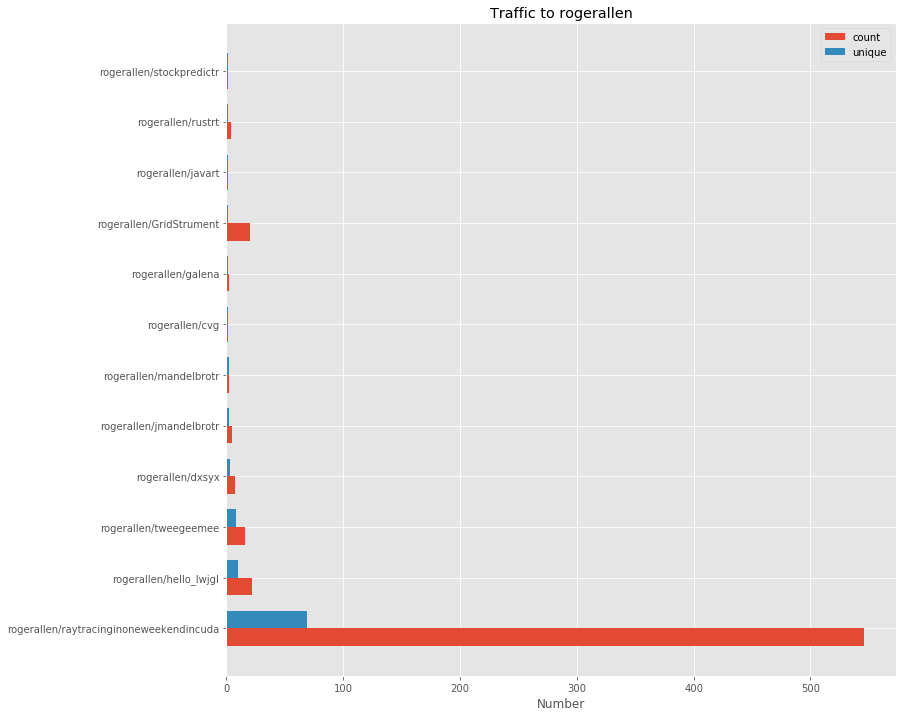

In [8]:
counts  = [x[1]['count'] for x in all_traffic]
uniques = [x[1]['uniques'] for x in all_traffic]
names   = [x[0] for x in all_traffic]
N = len(all_traffic)

plt.figure(figsize=(12,12))
ind = np.arange(N) 
height = 0.35       
plt.barh(ind, counts, height, label='count')
plt.barh(ind + height, uniques, height, label='unique')

plt.xlabel('Number')
plt.title('Traffic to rogerallen')
#plt.invert_yaxis()
plt.yticks(ind + height / 2, names)
plt.legend(loc='best')
plt.show()

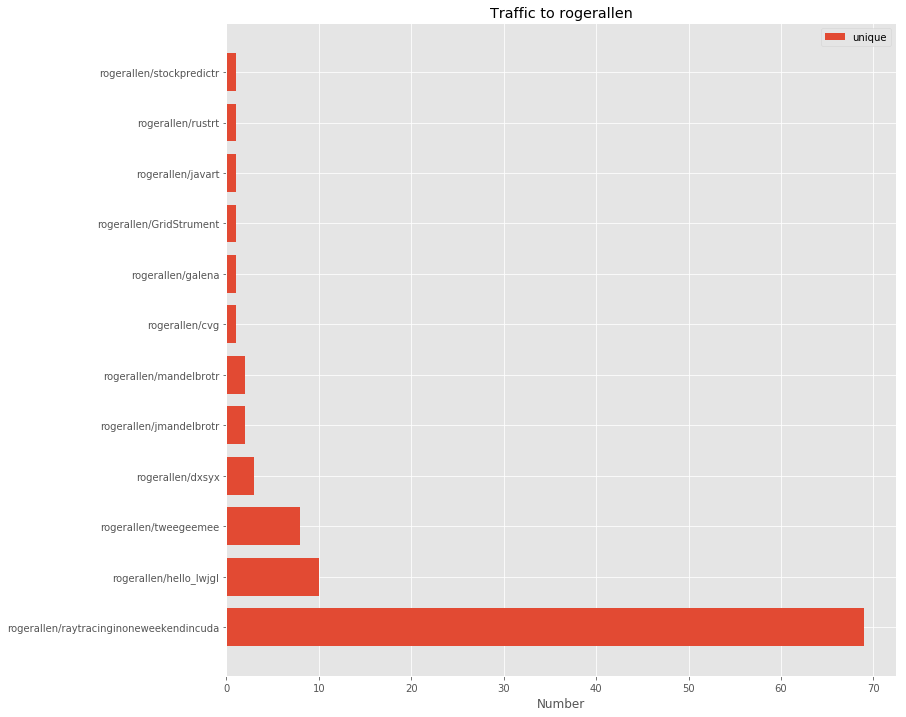

In [9]:
plt.figure(figsize=(12,12))
ind = np.arange(N) 
height = 0.75       
#plt.barh(ind, counts, height, label='count')
plt.barh(ind, uniques, height, label='unique')

plt.xlabel('Number')
plt.title('Traffic to rogerallen')
#plt.invert_yaxis()
plt.yticks(ind, names)
plt.legend(loc='best')
plt.show()